# Comparing Partitions 

## Build a library of partitions 

In [ ]:
!pip install cdlib 

In [71]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
G = nx.karate_club_graph()
G = nx.les_miserables_graph()

In [76]:
from cdlib import algorithms

In [77]:
!pip install wurlitzer

In [78]:
!pip install infomap leidenalg

  Using cached igraph-0.10.4-cp39-abi3-macosx_11_0_arm64.whl (1.7 MB)
  Attempting uninstall: igraph
    Found existing installation: igraph 0.9.10
    Uninstalling igraph-0.9.10:
      Successfully uninstalled igraph-0.9.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
python-igraph 0.9.10 requires igraph==0.9.10, but you have igraph 0.10.4 which is incompatible.


In [79]:
from cdlib import algorithms

funcs = [
    algorithms.label_propagation,
    algorithms.louvain,
    algorithms.walktrap,
    algorithms.surprise_communities,
    algorithms.label_propagation,
    algorithms.rb_pots,
    algorithms.spinglass,
    algorithms.markov_clustering,
    #     algorithms.lswl,
    algorithms.infomap,
    #     algorithms.async_fluid,
    algorithms.significance_communities,
    algorithms.eigenvector
    #     algorithms.sbm_dl_nested
]

In [80]:
partitions = {}

for x in funcs:
    print(x.__name__)
    partitions[x.__name__] = x(G)

label_propagation
louvain
walktrap
surprise_communities
label_propagation
rb_pots
spinglass
markov_clustering
infomap
significance_communities
eigenvector


In [81]:
partitions["label_propagation"].communities

[['Marguerite',
  'Javert',
  'Isabeau',
  'Champmathieu',
  'Judge',
  'Woman1',
  'Toussaint',
  'MmeDeR',
  'Perpetue',
  'Fauchelevent',
  'MlleBaptistine',
  'MmeMagloire',
  'Labarre',
  'MotherInnocent',
  'Gribier',
  'Brevet',
  'Gervais',
  'Cochepaille',
  'Bamatabois',
  'Chenildieu',
  'Valjean',
  'Woman2',
  'Scaufflaire',
  'Simplice'],
 ['Dahlia',
  'Pontmercy',
  'Blacheville',
  'Fameuil',
  'Fantine',
  'Gillenormand',
  'Listolier',
  'MlleVaubois',
  'Favourite',
  'MlleGillenormand',
  'MmePontmercy',
  'Zephine',
  'LtGillenormand',
  'Tholomyes',
  'Cosette',
  'BaronessT'],
 ['Gavroche',
  'Grantaire',
  'MotherPlutarch',
  'Bossuet',
  'Mabeuf',
  'MmeHucheloup',
  'Combeferre',
  'Courfeyrac',
  'Enjolras',
  'Marius',
  'Prouvaire',
  'Joly',
  'Feuilly',
  'Bahorel'],
 ['Magnon',
  'Babet',
  'Boulatruelle',
  'Eponine',
  'Anzelma',
  'Gueulemer',
  'Montparnasse',
  'Claquesous',
  'MmeThenardier',
  'Brujon',
  'Thenardier'],
 ['Cravatte',
  'Geborand',

## comparison of partitions 

In [82]:
!pip install clusim

  Using cached igraph-0.9.10-cp39-cp39-macosx_11_0_arm64.whl (1.5 MB)
  Attempting uninstall: igraph
    Found existing installation: igraph 0.10.4
    Uninstalling igraph-0.10.4:
      Successfully uninstalled igraph-0.10.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
leidenalg 0.9.1 requires igraph<0.11,>=0.10.0, but you have igraph 0.9.10 which is incompatible.


In [83]:
from clusim.clustering import Clustering, print_clustering
import clusim.sim as sim
import clusim.clugen as clugen

### Random partitions example

In [84]:
c1 = clugen.make_random_clustering(n_elements=10, n_clusters=2)
c2 = clugen.make_random_clustering(n_elements=10, n_clusters=5)

print_clustering(c1)
print_clustering(c2)

row_format2 = "{:>25}" * (2)
for simfunc in sim.available_similarity_measures:
    print(row_format2.format(simfunc, eval("sim." + simfunc + "(c1, c2)")))

097|12|346|85
0|15|26|3|84|97
            jaccard_index      0.09090909090909091
               rand_index       0.7777777777777778
            adjrand_index      0.05462184873949519
    fowlkes_mallows_index      0.17677669529663687
                 fmeasure      0.16666666666666666
             purity_index                      0.5
     classification_error                      0.5
        czekanowski_index      0.16666666666666666
               dice_index      0.16666666666666666
           sorensen_index      0.16666666666666666
    rogers_tanimoto_index       0.6363636363636364
          southwood_index                      0.1
      pearson_correlation   0.00026779828609096903
         corrected_chance     0.023772442658020327
      sample_expected_sim      0.09090909090909091
                      nmi       0.6102771471247717
                       mi       1.3709505944546692
                   adj_mi      0.06190919318831636
                      rmi    -0.007308980940285537
 

## bulk comparison 

In [85]:
sim_partitions = {}

for x in partitions:
    sim_partitions[x] = Clustering().from_cluster_list(partitions[x].communities)

In [86]:
def comparison_matrix(parts, simfunc):
    ks = list(parts.keys())
    from itertools import combinations
    from collections import defaultdict

    mat = defaultdict(dict)
    for k, kk in combinations(ks, 2):
        mat[k][kk] = simfunc(parts[k], parts[kk])
    return pd.DataFrame(mat)

In [87]:
comp_df = comparison_matrix(sim_partitions, sim.nmi)

comp_df

,label_propagation,louvain,walktrap,surprise_communities,rb_pots,spinglass,markov_clustering,infomap,significance_communities
louvain,0.699764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
walktrap,0.693632,0.658128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
surprise_communities,0.678990,0.638797,0.740572,NaN,NaN,NaN,NaN,NaN,NaN
rb_pots,0.691415,0.871015,0.728346,0.721737,NaN,NaN,NaN,NaN,NaN
spinglass,0.732612,0.822512,0.759390,0.741746,0.952185,NaN,NaN,NaN,NaN
markov_clustering,0.618237,0.708461,0.652796,0.474659,0.644010,0.684033,NaN,NaN,NaN
infomap,0.732466,0.848967,0.729392,0.735313,0.781273,0.742333,0.626293,NaN,NaN
significance_communities,0.691633,0.630627,0.709464,0.963308,0.718422,0.737896,0.457690,0.709643,NaN
eigenvector,0.668923,0.759628,0.711227,0.716290,0.808435,0.764878,0.516090,0.749298,0.706902


<AxesSubplot:>

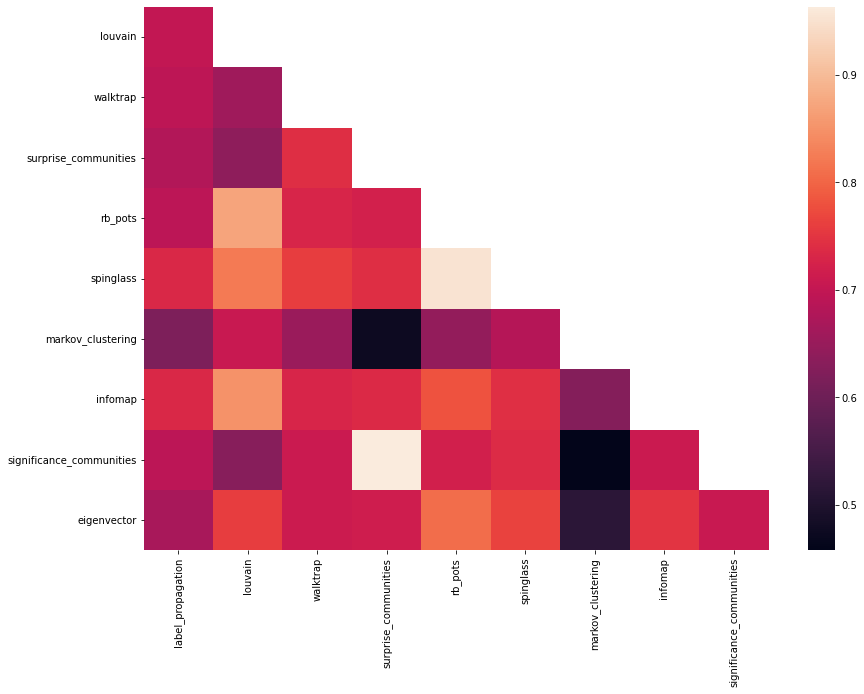

In [88]:
from seaborn import heatmap

fig = plt.figure(figsize=(14, 10))
heatmap(comp_df)